In [1]:
# import the packages
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# set figure size
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
# read the data in a dataframe
df = pd.read_csv('Sample Data/AMAZON_stock.csv')
print(df.shape)

(1259, 7)


In [3]:
# inspect the datafrmae
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-05-19,962.840027,968.919983,959.719971,959.840027,959.840027,3972100
1,2017-05-22,964.000000,971.380005,962.900024,970.669983,970.669983,2642200
2,2017-05-23,975.020020,975.200012,966.849976,971.539978,971.539978,2415600
3,2017-05-24,976.000000,981.000000,970.229980,980.349976,980.349976,2446000
4,2017-05-25,984.849976,999.000000,982.109985,993.380005,993.380005,4822000


In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1254,2022-05-12,2055.000000,2215.610107,2048.110107,2138.610107,2138.610107,6601300
1255,2022-05-13,2181.379883,2263.679932,2156.000000,2261.100098,2261.100098,4676700
1256,2022-05-16,2262.000000,2279.850098,2207.080078,2216.209961,2216.209961,3728300
1257,2022-05-17,2265.500000,2316.000000,2225.530029,2307.370117,2307.370117,3822400
1258,2022-05-18,2228.790039,2257.060059,2124.979980,2142.250000,2142.250000,5404100


<AxesSubplot:>

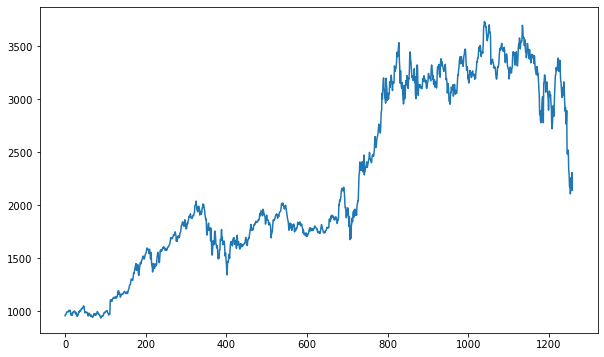

In [5]:
# plot the column - Close
df['Close'].plot()

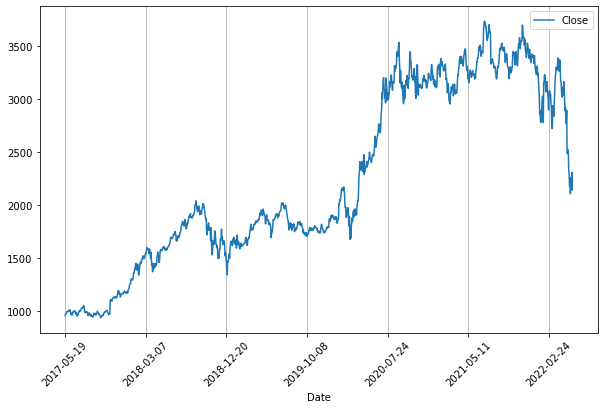

In [6]:
# plot with dates in x axis
df.plot(x='Date', y='Close')
plt.xticks(rotation=45)
plt.grid(True, axis='x')
plt.show()

## Test for stationarity
Augmented Dicky-Fuller test:</br>
test statistic: stationary series are likely to have higher negative values </br>
null -hypothesis: presence of unit root (non-stationary) </br>

In [7]:
# do the statistical test for time series stationairty check
result = adfuller(df['Close'])

In [8]:
print(result[0], result[1])
# [0] : test statistics, [1] : p value
# higher negative value of test statistic -> stationary

-1.5673307982000264 0.4999804069946781


## Make the series stationary

In [9]:
# make the time series stationary
df['log_close'] = np.log(df['Close'])

<function matplotlib.pyplot.show(close=None, block=None)>

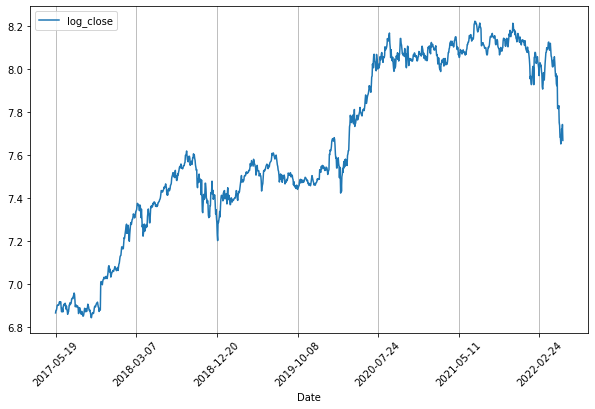

In [10]:
df.plot(x='Date', y='log_close')
plt.xticks(rotation=45)
plt.grid(True, axis='x')
plt.show

In [11]:
result = adfuller(df['log_close'])
print('test sttistic: ', result[0])
print('p-value: ', result[1])
# 검정통계량의 절댓값이 커졌기 때문에, log를 취한 값이 보다 정상성에 가까움을 알 수 있음

test sttistic:  -1.8878019728567856
p-value:  0.3378210261971666


In [12]:
# make stationary using series differencing
amazon = df[['Date', 'log_close']] # new dataframe with selected columns only
amazon_sarimax = df[['Date', 'log_close']]
amazon['diff_log_close'] = amazon['log_close'].diff().dropna()
amazon_diff = amazon[['Date', 'diff_log_close']]

/var/folders/nc/lzp_t3zn1m5_9jr25f_8fqj00000gn/T/ipykernel_25791/1312015956.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon['diff_log_close'] = amazon['log_close'].diff().dropna()


In [13]:
# process the dataframes for different models
amazon_sarimax = df[['Date','log_close']]
amazon_prophet = df[['Date','log_close']]
amazon.drop('diff_log_close', axis=1, inplace=True)
amazon.set_index('Date', inplace=True)  # set the date column as index
amazon_diff.set_index('Date', inplace=True)
amazon_diff.dropna(inplace=True)
amazon_diff

/var/folders/nc/lzp_t3zn1m5_9jr25f_8fqj00000gn/T/ipykernel_25791/1526445265.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon.drop('diff_log_close', axis=1, inplace=True)
/var/folders/nc/lzp_t3zn1m5_9jr25f_8fqj00000gn/T/ipykernel_25791/1526445265.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon_diff.dropna(inplace=True)


,diff_log_close
Date,
2017-05-22,0.011220
2017-05-23,0.000896
2017-05-24,0.009027
2017-05-25,0.013204
2017-05-26,0.002413
...,...
2022-05-12,0.014682
2022-05-13,0.055695
2022-05-16,-0.020053


In [14]:
# conduct stationarity test again
result = adfuller(amazon_diff['diff_log_close'])

# Print test statistic
print('statistic:', result[0],'\n', 'p-value:', result[1])
# Print test statistic
print('p-value:', np.round(result[1], 5))

statistic: -12.845118815143953 
 p-value: 5.5011796560613475e-24
p-value: 0.0


> p-value < 0.05 : rejects the null hypothesis

## Fit ARMA model

In [15]:
# Create ARMA(2,2) model
arma = SARIMAX(amazon_diff, order=(2,0,2))

# Fit model
arma_results = arma.fit()

# Print fit summary
print(arma_results.summary())

/Users/Yunhee/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/Yunhee/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.46298D+00    |proj g|=  2.96443D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      2     20      1     0     0   2.148D-02  -2.463D+00
  F =  -2.4629832290738713     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                               SARIMAX Results                                
Dep. Variable:         diff_log_close   No. Observations:                 1258
Model:               SARIMAX(2, 0, 2

In [16]:
# use arma model to predict the stock price for the next 30 days
arma_diff_forecast = arma_results.get_forecast(steps=30).predicted_mean 

/Users/Yunhee/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [17]:
arma_int_forecast = np.cumsum(arma_diff_forecast)

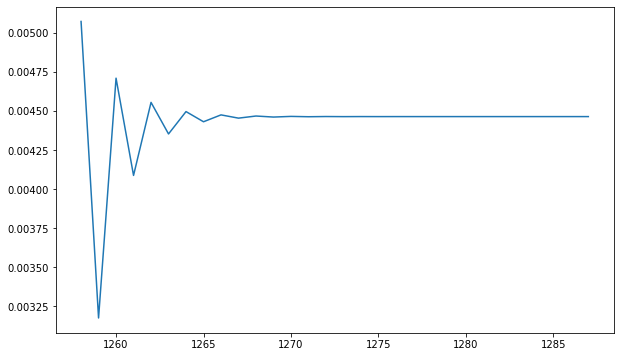

In [18]:
plt.plot(arma_int_forecast)

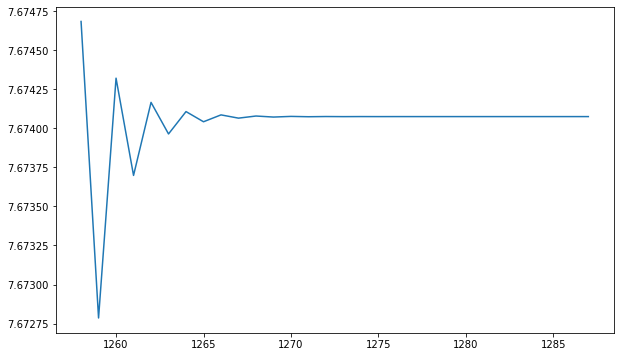

In [19]:
# addd this cumsum to the last value of the original time series
arma_value_forecast = arma_int_forecast + df[['log_close']].iloc[-1,0]
plt.plot(arma_value_forecast)

## Fit ARIMA model
Helps to avoid the differencing and cumsum reversion

In [20]:
# Create ARIMA(2,1,2) model
arima = SARIMAX(amazon, order=(2,1,2))

# Fit ARIMA model
arima_results = arima.fit()

# Make ARIMA forecast of next 10 values
arima_value_forecast = arima_results.get_forecast(steps=30).predicted_mean

# Print forecast
print(arima_value_forecast)

/Users/Yunhee/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/Yunhee/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.46102D+00    |proj g|=  2.96211D-01


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      2     13      1     0     0   2.132D-02  -2.461D+00
  F =  -2.4610269278800692     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
1259    7.674685
1260    7.672786
1261    7.674322
1262    7.673699
1263    7.674167
1264    7.673964
1265    7.674108
1266    7.674043
1267    7.674087
1268    7.674066
1269    7.674079
1270    7.674073
1271    7.674077
1272    7.674075
1273    7.674076
1274    7.674075
1275    7.674076
1276    7.674076
1277    7.674076
1278    7.674076
1279    7.674076
1280    7.674076
1281    7.674076
1282    7.674076
1283    7.67407

/Users/Yunhee/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


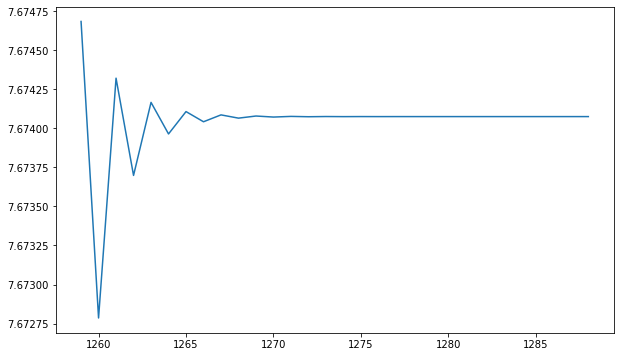

In [21]:
plt.plot(arima_value_forecast)

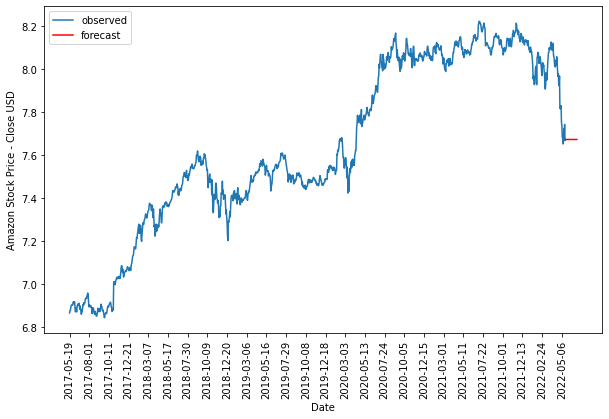

In [22]:
# plot the amazon data
plt.figure(figsize=(10,6))
plt.plot(amazon.index, amazon['log_close'], label='observed')
# plot your mean predictions
plt.plot(arima_value_forecast.index, arima_value_forecast, color='r', label='forecast')
# set labels, legends and show plot
plt.xlabel('Date')
plt.xticks(amazon.index[::50],  rotation='vertical')
plt.ylabel('Amazon Stock Price - Close USD')
plt.legend()
plt.show()

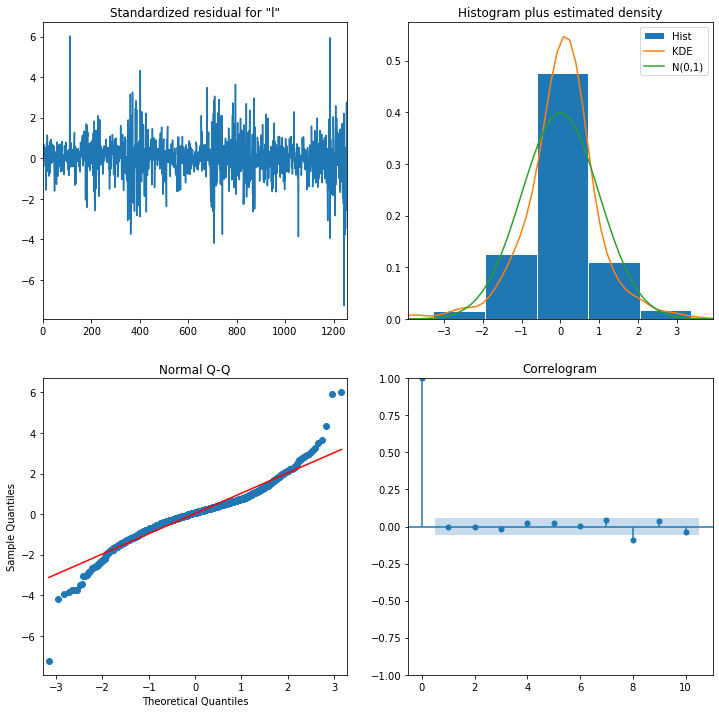

In [23]:
# Create the 4 diagostics plots
plt.rcParams['figure.figsize']=(12, 12)
arima_results.plot_diagnostics()
plt.show()

In [24]:
# model diagnostics

# Calculate the mean absolute error from residuals
mae = np.mean(np.abs(arima_results.resid))

# Print mean absolute error
print(mae)

0.019707704913969212


## Fit a SARIMA model

In [25]:
amazon_sarimax['Date'] = pd.to_datetime(amazon_sarimax['Date'])
amazon_sarimax = amazon_sarimax.set_index('Date')
amazon_sarimax.dropna(inplace=True)
amazon_sarimax = amazon_sarimax.asfreq('D')

/var/folders/nc/lzp_t3zn1m5_9jr25f_8fqj00000gn/T/ipykernel_25791/46510659.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon_sarimax['Date'] = pd.to_datetime(amazon_sarimax['Date'])


In [26]:
model = SARIMAX(amazon, order=(1,0,0), seasonal_order=(1,1,0,7))
# first part : auto regressive part
# second part : order of the seasonality

# Fit the model
results = model.fit()

# Print the results summary
print(results.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.17205D+00    |proj g|=  4.25357D-01

At iterate    5    f= -2.27324D+00    |proj g|=  1.12724D+00

At iterate   10    f= -2.27512D+00    |proj g|=  1.88466D-01


/Users/Yunhee/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/Yunhee/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f= -2.27877D+00    |proj g|=  1.89625D+00

At iterate   20    f= -2.28284D+00    |proj g|=  1.94576D-02

At iterate   25    f= -2.28284D+00    |proj g|=  9.32390D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     43      1     0     0   9.324D-03  -2.283D+00
  F =  -2.2828401025515066     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                                     SARIMAX Results                                     
Dep. Variable:                         log_close   No. Observations:                 1259
Model:             SARIMAX(1, 0, 0)x(1, 1, 0, 7)   Log Li

In [27]:
sarima_forecast = results.get_forecast(steps=30).predicted_mean
sarima_forecast 

/Users/Yunhee/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


1259    7.613166
1260    7.608871
1261    7.626996
1262    7.673192
1263    7.635151
1264    7.658538
1265    7.601521
1266    7.578516
1267    7.567366
1268    7.589593
1269    7.645382
1270    7.620402
1271    7.655924
1272    7.594778
1273    7.559756
1274    7.554992
1275    7.578219
1276    7.632189
1277    7.603537
1278    7.635598
1279    7.578347
1280    7.550705
1281    7.544604
1282    7.568848
1283    7.625009
1284    7.599285
1285    7.634064
1286    7.576010
1287    7.545855
1288    7.541206
Name: predicted_mean, dtype: float64

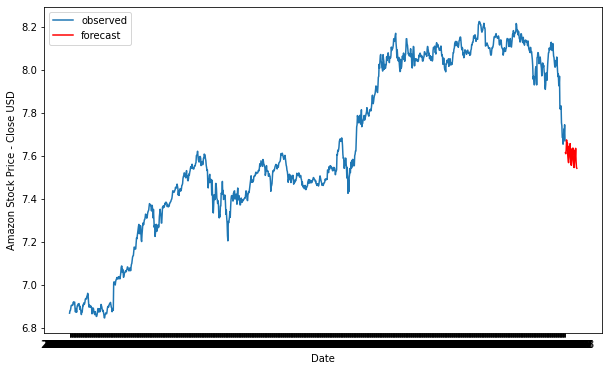

In [28]:
# plot the amazon data
plt.figure(figsize=(10,6))
plt.plot(amazon.index, amazon['log_close'], label='observed')
# plot your mean predictions
plt.plot(sarima_forecast.index, sarima_forecast, color='r', label='forecast')
# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Amazon Stock Price - Close USD')
plt.legend()
plt.show()

## Intuitive model selection
Autocorrelation function and cumulative autocorrelation function plots help

/Users/Yunhee/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


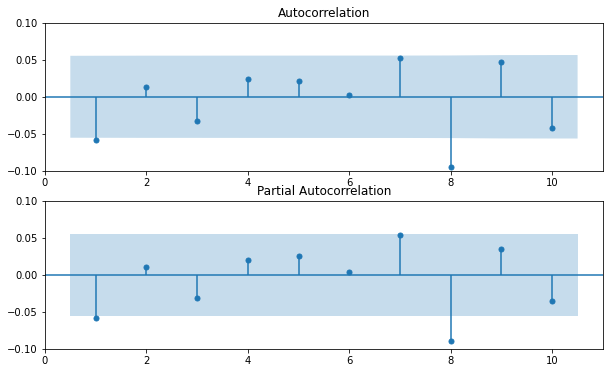

In [29]:
# import autocorrelation function and partial autocorrelation function plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10,6)) 
# plot acf
plot_acf(amazon_diff, lags=10, zero=False, ax= ax1)
ax1.set_ylim(-0.1, 0.1)  # Set y-axis limits for the ACF plot

# plot acf
plot_pacf(amazon_diff, lags=10, zero=False, ax = ax2)
ax2.set_ylim(-0.1, 0.1)  # Set y-axis limits for the PACF plot

plt.show()

## Comparing models
Using AIC and BIC

In [30]:
amazon.index = pd.DatetimeIndex(amazon.index).to_period('D')

In [31]:
# Loop over p and q values from 0-3
for p in range(3):
    for q in range(3):
      try:
            model = SARIMAX(amazon, order=(p,1,q))
            results = model.fit()
            print(p, q, np.round(results.aic, 2), np.round(results.bic,2))
      except:
            print(p, q, None, None)

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.45906D+00    |proj g|=  1.50316D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      2     15      1     0     0   5.788D-04  -2.459D+00
  F =  -2.4590634654803600     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
0 0 -6189.92 -6184.78
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At i

 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      2     13      1     0     0   2.185D-02  -2.461D+00
  F =  -2.4607728159627658     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
0 2 -6190.23 -6174.81
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.46075D+00    |proj g|=  5.06176D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      2     25      1     0     0   1.575D-02  -2.461D+00
  F =  -2.4609598758967839     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
1 1 -6190.7 -6175.29
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.46093D+00    |proj g|=  2.97937D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = n


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/Yunhee/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/Yunhee/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.



At iterate   15    f= -2.46081D+00    |proj g|=  7.48816D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     28      1     0     0   7.488D-03  -2.461D+00
  F =  -2.4608082325005225     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
2 1 -6188.32 -6167.77
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.46102D+00    |proj g|=  2.96211D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = tot

 This problem is unconstrained.


## Prophet base model

In [32]:
amazon_prophet.head()

,Date,log_close
0,2017-05-19,6.866767
1,2017-05-22,6.877987
2,2017-05-23,6.878882
3,2017-05-24,6.887910
4,2017-05-25,6.901113


In [33]:
# rename the dataframe columns
amazon_prophet.columns = ['ds', 'y']
amazon_prophet.head()

,ds,y
0,2017-05-19,6.866767
1,2017-05-22,6.877987
2,2017-05-23,6.878882
3,2017-05-24,6.887910
4,2017-05-25,6.901113


In [34]:
!pip install prophet

In [35]:
# import the prophet package
from prophet import Prophet

In [36]:
# instantiate the prophet model
m = Prophet()

In [37]:
# fit the model to the time series data
m.fit(amazon_prophet)

16:26:18 - cmdstanpy - INFO - Chain [1] start processing
16:26:19 - cmdstanpy - INFO - Chain [1] done processing


In [38]:
future = m.make_future_dataframe(periods=30) # make future dataframe

In [39]:
# make forecast for the future
forecast = m.predict(future)

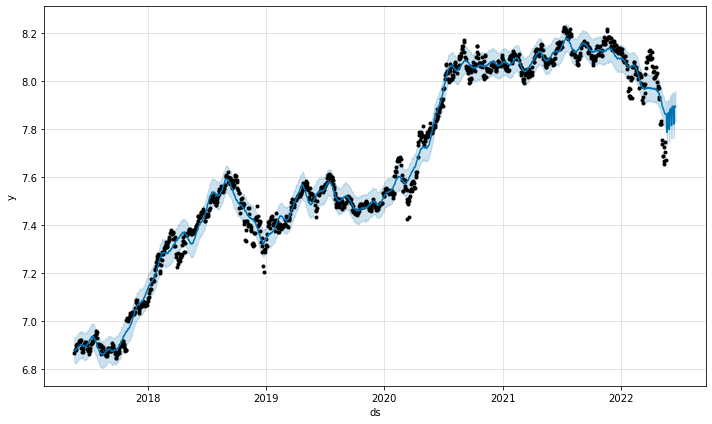

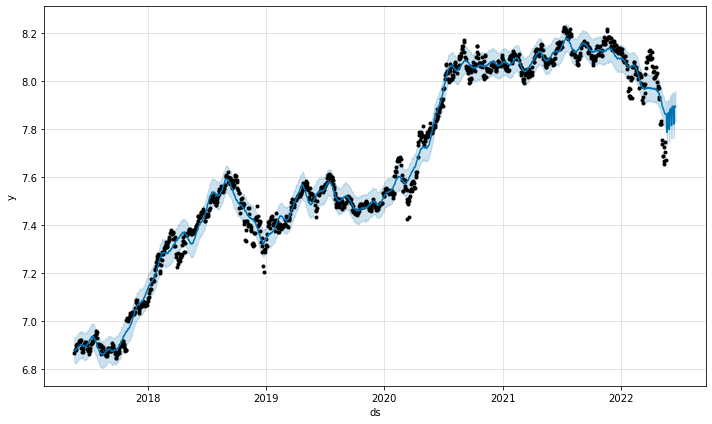

In [40]:
# plot the forecast
m.plot(forecast)

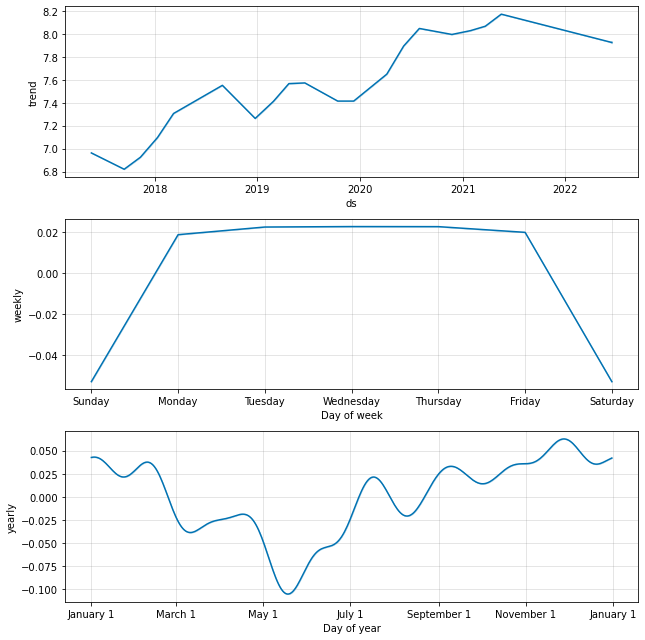

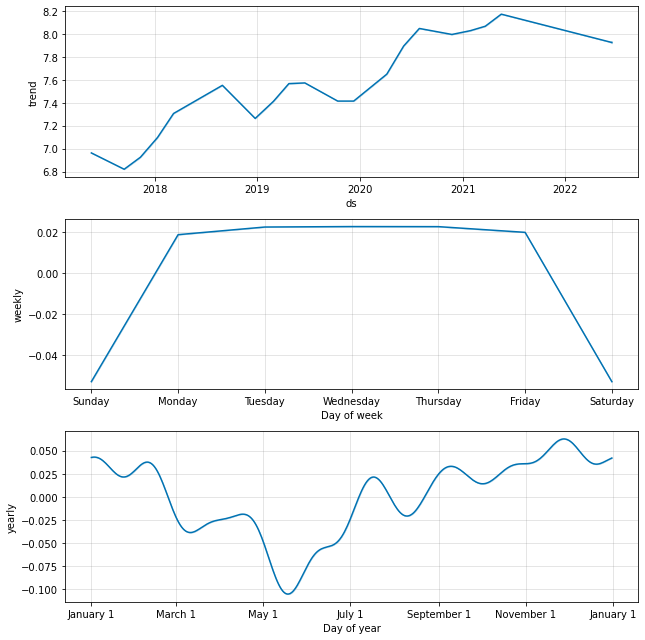

In [41]:
# component plots
m.plot_components(forecast)